# Plot the histograms summarizing the CCT distribution of generations per individual movie:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import sys
sys.path.append("../")

from tqdm import tqdm
from Movie_Analysis_Pipeline.Single_Movie_Processing.Server_Movies_Paths import Get_MDCK_Movies_Paths


In [3]:
def Extract_CCT(hdf5_file):
    """ """

    cct = [[] for _ in range(10)]
    
    with h5py.File(hdf5_file, 'r') as f:
        movie_length = len(f["objects"]["obj_type_1"]["map"])
        total_cells = len(f["tracks"]["obj_type_1"]["LBEPR"])
        cct = [[] for _ in range(10)]

        for cell in f["tracks"]["obj_type_1"]["Ch_Ch_Gen_CCT"]:
            if int(cell[0]) != 0 and int(cell[1]) != 0 and int(cell[2]) > 0:
                cct[int(cell[2])].append(float(cell[3]))
    
    return cct, movie_length, total_cells
    

### Plot individual movie histogram:

In [4]:
movies = Get_MDCK_Movies_Paths()
#cct = [[] for _ in range(10)]


Movie: AB0124, pos7		Total = 15227
Gen #1 -> 441 cells (2.8961712747093977%)	Gen #2 -> 210 cells (1.3791291784330466%)	Gen #3 -> 98 cells (0.6435936166020884%)	Gen #4 -> 37 cells (0.2429894266762987%)	Gen #5 -> 15 cells (0.0985092270309319%)	Gen #6 -> 8 cells (0.05253825441649701%)	Gen #7 -> 3 cells (0.01970184540618638%)	Gen #8 -> 1 cells (0.006567281802062126%)	Gen #9 -> 1 cells (0.006567281802062126%)	
Movie: AB0124, pos8		Total = 17128
Gen #1 -> 498 cells (2.907519850537132%)	Gen #2 -> 215 cells (1.255254553946754%)	Gen #3 -> 97 cells (0.5663241475945819%)	Gen #4 -> 31 cells (0.1809901914992994%)	Gen #5 -> 12 cells (0.07006071929005138%)	Gen #6 -> 9 cells (0.05254553946753853%)	Gen #7 -> 3 cells (0.017515179822512845%)	Gen #8 -> 1 cells (0.005838393274170948%)	Gen #9 -> 0 cells (0.0%)	
Movie: AB0124, pos9		Total = 14678
Gen #1 -> 443 cells (3.0181223599945497%)	Gen #2 -> 201 cells (1.3693963755280012%)	Gen #3 -> 70 cells (0.47690421038288594%)	Gen #4 -> 25 cells (0.170322932279602

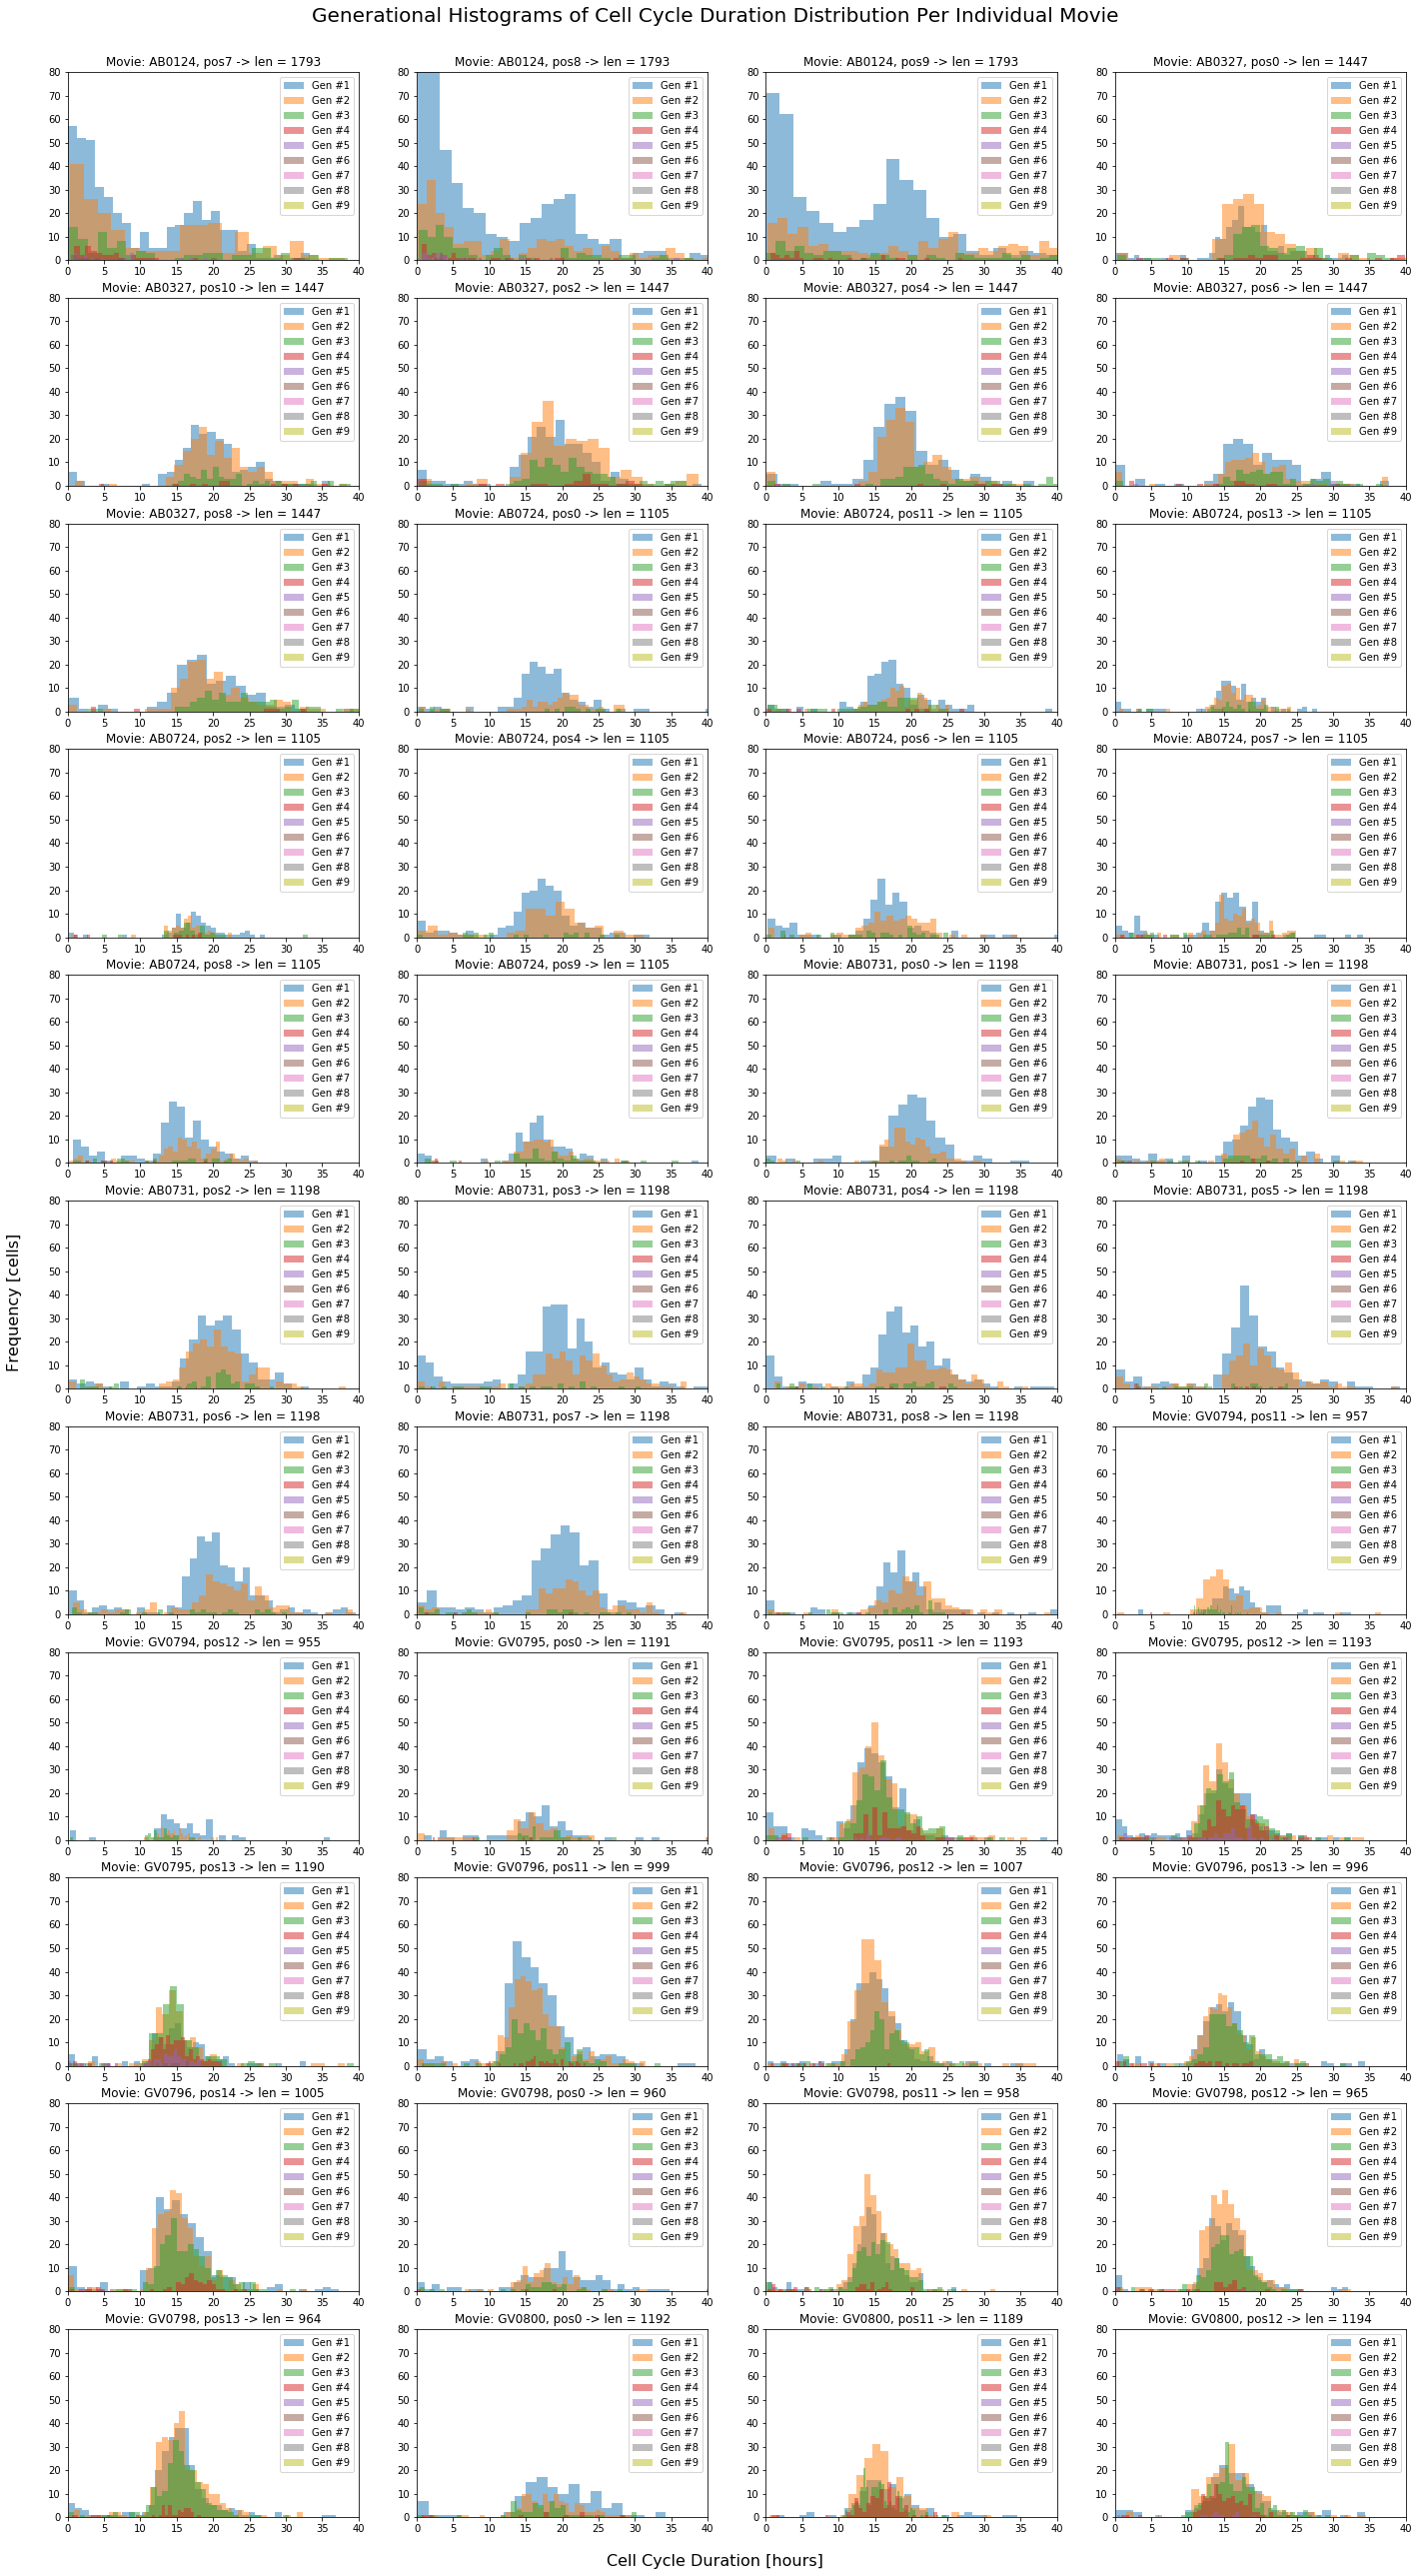

In [10]:
fig, axs = plt.subplots(figsize=(24, 45), nrows=11, ncols=4)
fig.suptitle(t="Generational Histograms of Cell Cycle Duration Distribution Per Individual Movie", x=0.5, y=0.9, fontsize=20)
fig.text(x=0.5, y=0.11, s="Cell Cycle Duration [hours]", ha='center', fontsize=16)
fig.text(x=0.09, y=0.5, s="Frequency [cells]", va='center', rotation='vertical', fontsize=16)

for enum, movie in enumerate(movies):
    pos, date = movie.split("/")[-2], movie.split("/")[-3]
    hdf5_file = movie + "/HDF/segmented.hdf5"
    
    with h5py.File(hdf5_file, 'r') as f:
        length = len(f["objects"]["obj_type_1"]["map"])
        total_cells = len(f["tracks"]["obj_type_1"]["LBEPR"])
        cct = [[] for _ in range(10)]

        for cell in f["tracks"]["obj_type_1"]["Ch_Ch_Gen_CCT"]:
            if int(cell[0]) != 0 and int(cell[1]) != 0 and int(cell[2]) > 0:
                cct[int(cell[2])].append(float(cell[3]))
    
    # Plot the individual 2D histograms for each file:
    print ("\nMovie: {}, {}\t\tTotal = {}".format(date, pos, total_cells))
    for idx, gen in enumerate(cct[1:]):
        print ("Gen #{} -> {} cells ({}%)".format(idx+1, len(gen), round(100*len(gen)/total_cells), 2), end="\t")
        axs[enum // 4, enum % 4].hist(gen, bins=40, alpha=0.5, label="Gen #{}".format(idx+1))
        axs[enum // 4, enum % 4].set_title("Movie: {}, {} -> len = {}".format(date, pos, length))
        axs[enum // 4, enum % 4].set_xlim(0, 40)
        axs[enum // 4, enum % 4].set_ylim(0, 80)
        axs[enum // 4, enum % 4].legend()
        
plt.show()
plt.close()

### Plot the cumulative histogram for all the movies in the dataset:

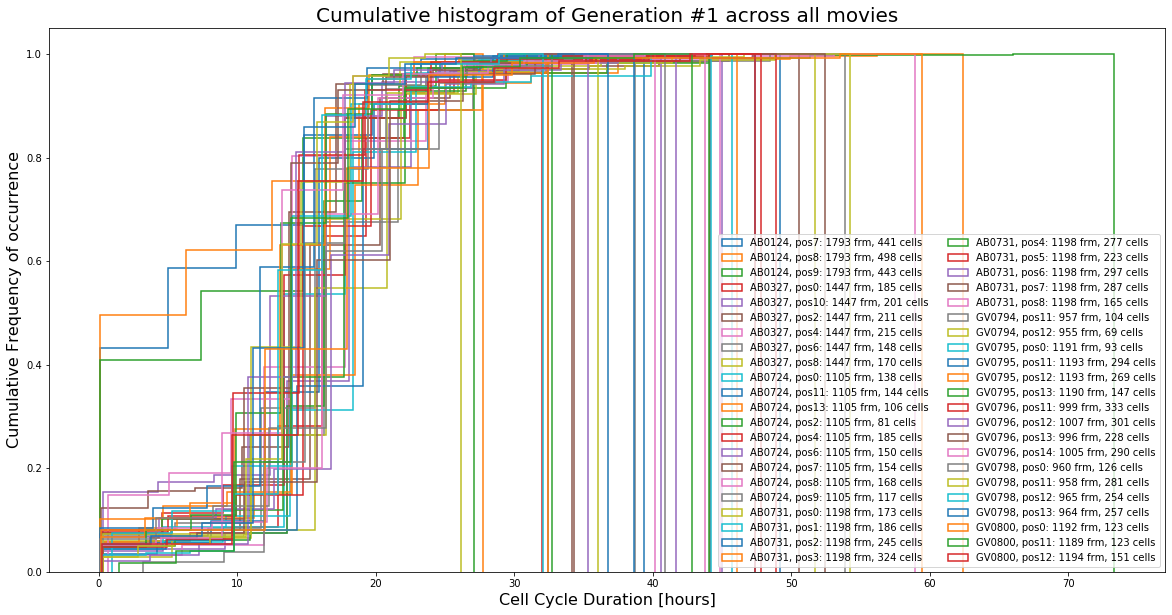

In [11]:
_ = plt.figure(figsize=(20, 10))

for movie in movies:
    #print ("Movie: {}".format(movie))
    #if "AB0124" in movie:
    #    continue
    hdf5_file = movie + "HDF/segmented.hdf5"
    pos, date = movie.split("/")[-2], movie.split("/")[-3]
    cct, movie_length, total_cells = Extract_CCT(hdf5_file=hdf5_file)
    
    plt.hist(x=cct[1], density=True, cumulative=True, histtype='step', linewidth=1.5, 
             label="{}, {}: {} frm, {} cells".format(date, pos, movie_length, len(cct[1])))
    
plt.title("Cumulative histogram of Generation #1 across all movies", fontsize=20)
plt.xlabel("Cell Cycle Duration [hours]", fontsize=16)
plt.ylabel("Cumulative Frequency of occurrence", fontsize=16)
plt.legend(loc='lower right', ncol=2, fontsize=10)
plt.show()
plt.close()